In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

# Insert the directory where psgpython module is located to sys.path
sys.path.insert(1, r'C:\Aorda\PSG\Python\psg_direct')

# Add your DLL directory to the PATH environment variable for the process
dll_directory = r'C:\Aorda\PSG\lib'
os.environ['PATH'] = dll_directory + os.pathsep + os.environ['PATH']

import psgpython as psg

Selecting first two factors as per last name: x1, x2

In [4]:
matrix_scenarios_3f = pd.read_csv(r'C:\Users\vishn\Desktop\Nikhil\AMS 518\hw7\matrix_scenarios.txt', sep='\t')
matrix_scenarios_2f = matrix_scenarios_3f.drop(matrix_scenarios_3f.columns[2], axis=1)

# Performing exploratory data analysis

Head:
         x1        x2        x3  scenario_benchmark
0 -3.376601 -2.454612 -2.317172          175.516229
1  7.216563  5.001919  6.398638         -367.298926
2  0.577159  0.413124  0.207894          -39.810028
3 -8.307446 -6.139967 -4.550989          463.078969
4  1.520868  1.084228  0.926480          -89.059330

Tail:
           x1        x2        x3  scenario_benchmark
995 -4.592737 -3.353193 -2.952974          244.546549
996  3.066729  2.171100  2.211383         -167.861484
997 -1.247361 -0.899494 -1.049955           57.786437
998  0.323829  0.232039  0.023104          -26.444979
999  1.702266  1.212583  1.070192          -98.427696

Shape:
(1000, 4)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   x1                  1000 non-null   float64
 1   x2                  1000 non-null   float64
 2   x3                  

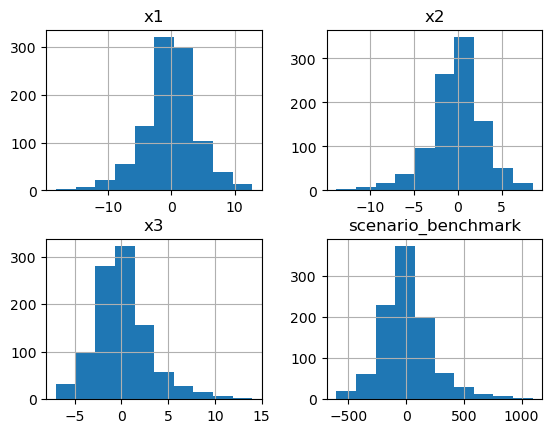

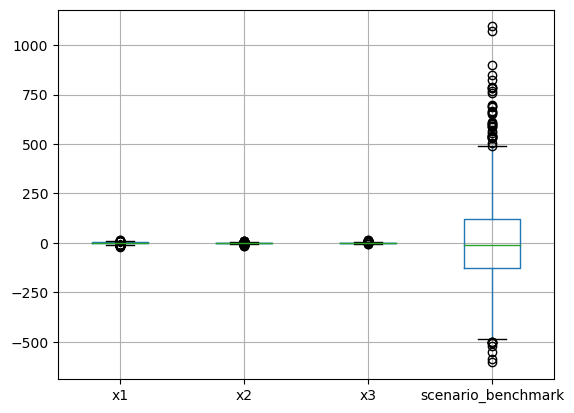

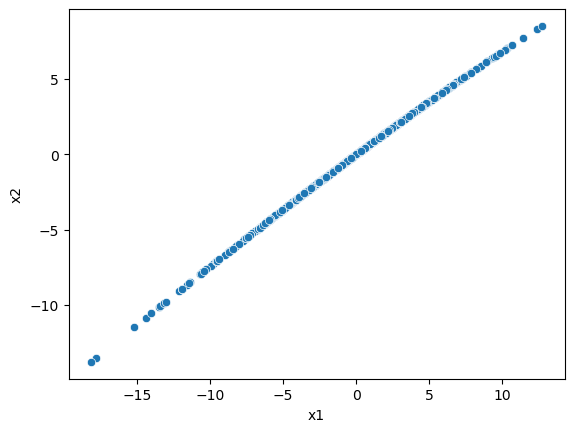

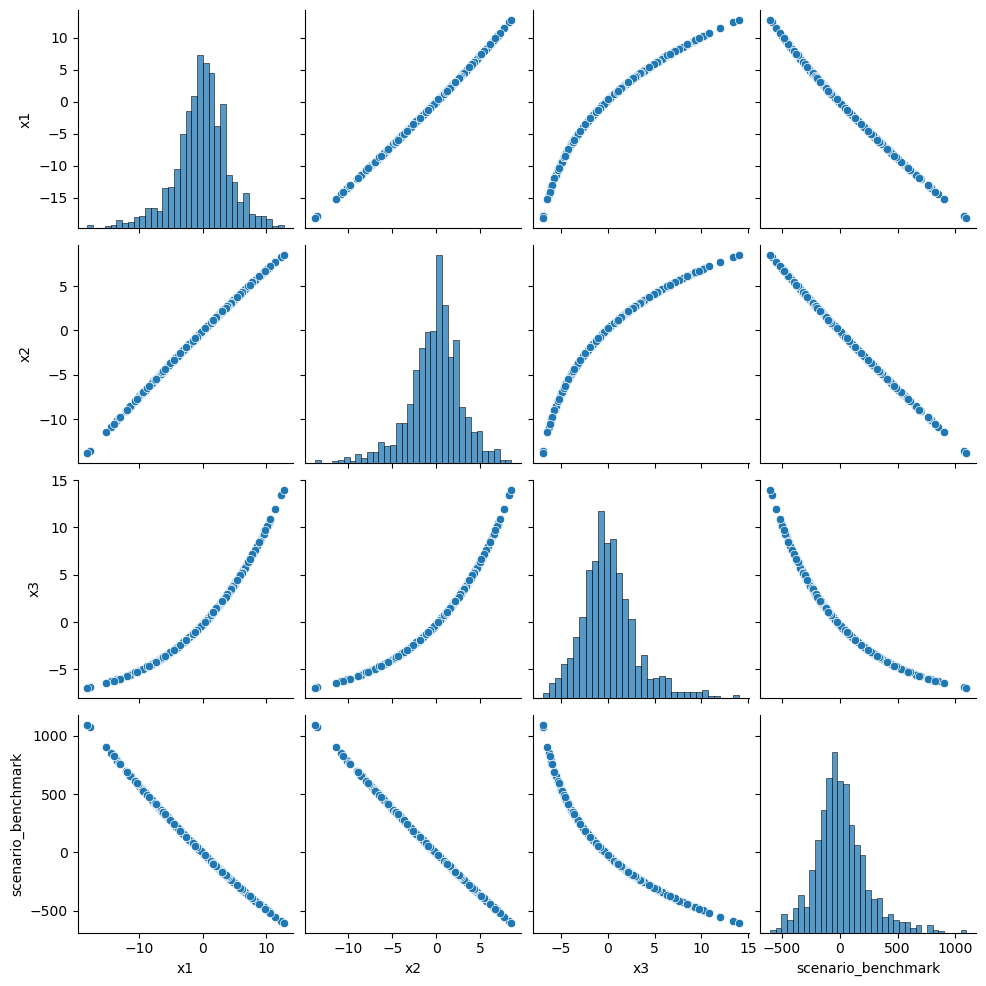

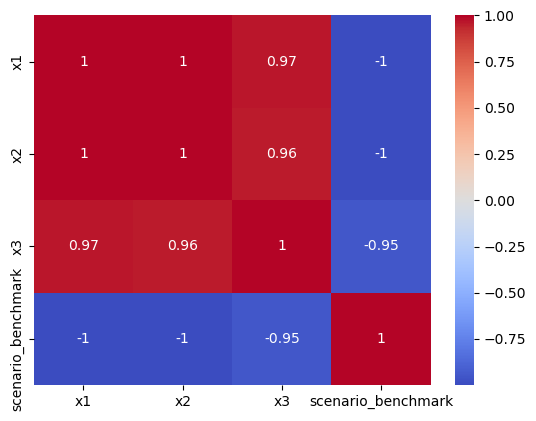

In [7]:
df = matrix_scenarios_3f

# 1. Understand the Data
print("Head:")
print(df.head())
print("\nTail:")
print(df.tail())
print("\nShape:")
print(df.shape)
print("\nInfo:")
print(df.info())
print("\nDescribe:")
print(df.describe())

# 2. Handle Missing Values
print("\nMissing Values:")
print(df.isnull().sum())
# Here, you can decide how to handle missing values
# For example, you can replace missing values with the median of the column
df['x3'] = df['x3'].fillna(df['x3'].median())

# 4. Visualize the Data
# Histogram
df.hist()
plt.show()

# Boxplot
df.boxplot()
plt.show()

# Scatter plot
sns.scatterplot(data=df, x='x1', y='x2')
plt.show()

# Pairplot
sns.pairplot(df)
plt.show()

# Heatmap of correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Modifying input data as per question #1 for the analysis

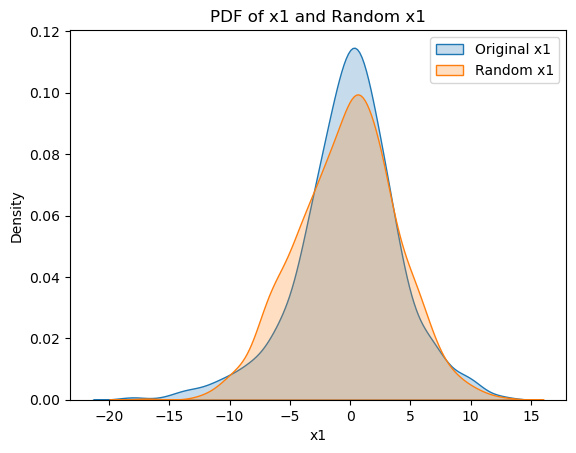

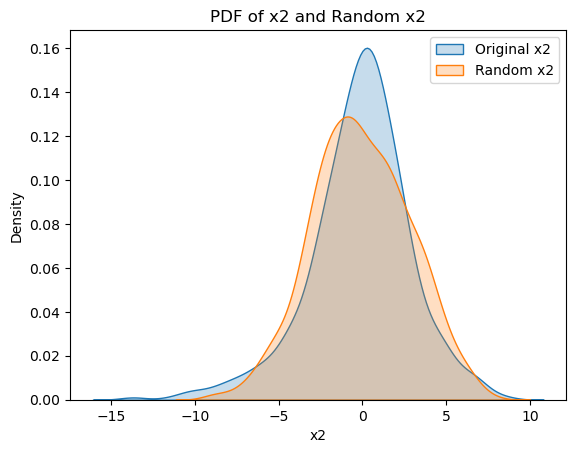

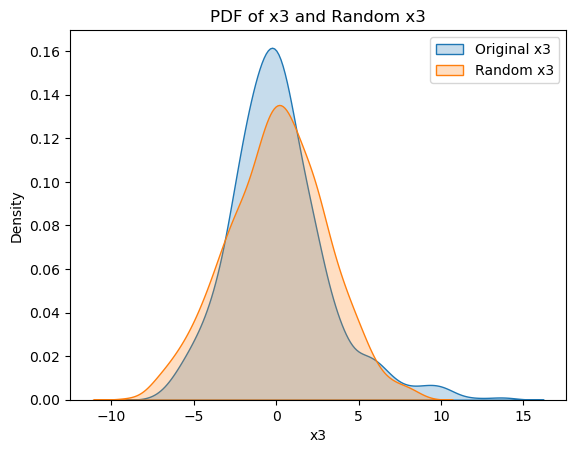

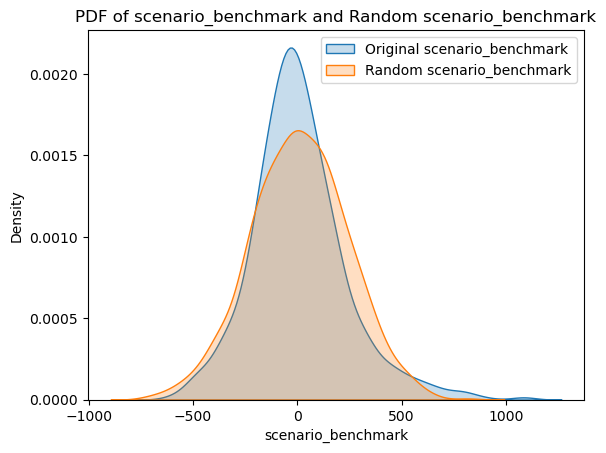

In [15]:
# List of column names to process
columns_to_process = ['x1', 'x2', 'x3', 'scenario_benchmark']

# Dictionary to store the new random lists
new_random_data = {}

# Process each column
for column_name in columns_to_process:
    # Fetch the column from the DataFrame
    column_data = df[column_name]

    # Analyze the column to get its mean and standard deviation
    mean_value = column_data.mean()
    std_value = column_data.std()

    # Generate a random list with a similar distribution
    random_list = np.random.normal(loc=mean_value, scale=std_value, size=len(column_data)).tolist()

    # Store the new random list in the dictionary
    new_random_data[f'random_{column_name}'] = random_list

    # Plot the PDFs of the original column data and the new random list
    sns.kdeplot(column_data, label=f'Original {column_name}', fill=True)
    sns.kdeplot(random_list, label=f'Random {column_name}', fill=True)
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.title(f'PDF of {column_name} and Random {column_name}')
    plt.legend()
    plt.show()

# Merge the new random lists to create a new DataFrame
new_df = pd.DataFrame(new_random_data)

# Dictionary with old and new column names
column_name_mapping = {
    'random_x1': 'x1',
    'random_x2': 'x2',
    'random_x3': 'x3',
    'random_scenario_benchmark': 'scenario_benchmark'
}

# Rename the columns
new_df_3f = new_df.rename(columns=column_name_mapping)

# 5 Fold CV on modified data matrix

In [17]:
allowExternal = True
suppressMessages = False
problem_name = "problem_test"
problem_statement = '''for {matrix_fact_in; matrix_fact_out; num} = crossvalidation(5, matrix_scenarios)

minimize 
st_dev(matrix_fact_in)
Value: 
  L_num(matrix_fact_out) 
  L_num(matrix_fact_in)
  cvar_dev(0.9, matrix_fact_in) meanabs_dev(matrix_fact_in)
  st_dev(matrix_fact_in)
  var_risk(0.75, matrix_fact_in)
  var_risk_g(0.75, matrix_fact_in)
  var_risk(0.9, matrix_fact_in)
  var_risk_g(0.9, matrix_fact_in)    
end for '''

problem_dictionary = {'problem_name':problem_name, 'problem_statement':problem_statement,'matrix_scenarios':matrix_scenarios_new_df_3f}

psg.psg_solver(problem_dictionary)

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of cutout(1,5,matrix_scenarios) was read
100% of takein(1,5,matrix_scenarios) was read
100% of matrix_scenarios was read
Start optimization
Ext.iteration=0  Objective=0.133932840581E+03  Residual=0.000000000000E+00
Ext.iteration=52  Objective=0.133440487995E+03  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 133.440487995 [1.166829690646E-07]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.14, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 133.440487995 [1.166829690646E-07]
Function: l_1(takein(1,5,matrix_scenarios)) = vector_l_1_2
Function: l_1(cutout(1,5,matrix_scenarios)) = vector_l_1_1
Function: cvar_dev(0.9,cutout(1,5,matrix_scenarios)) =  2.663915027682E+0

SystemError: <built-in function psg_solver> returned NULL without setting an error

In [122]:
df = matrix_scenarios_3f

# Number of repetitions
repetitions = 20

# Number of rows for testing
testing_rows = 100

# Different numbers of training rows to select - ensuring they are <= 900
training_row_options = [3,20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820,
860, 900]

# Initialize results dictionary
results = {n: [] for n in training_row_options}

# Perform the operation repetitions times for each number of training rows
for training_rows in training_row_options:
    for _ in range(repetitions):
        # Randomly select 100 rows for testing
        testing_set = df.sample(n=testing_rows)

        # Remove the testing set from the DataFrame
        remaining_df = df.drop(testing_set.index)

        # Randomly select a specified number of rows for training
        training_set = remaining_df.sample(n=training_rows)

        # Append the training and testing sets
        results[training_rows].append({'training_set': training_set, 'testing_set': testing_set})

# Now let's populate the matrices
training_matrices = {n: [] for n in training_row_options}
testing_matrices = {n: [] for n in training_row_options}

for n in training_row_options:
    for result in results[n]:
        training_matrices[n].append(result['training_set'].to_numpy())
        testing_matrices[n].append(result['testing_set'].to_numpy())

# Dictionaries to store the dataframes
training_dfs = {}
testing_dfs = {}

training_row_options = [3,20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820,
860, 900]
m_values = training_row_options
n_values = list(range(0,20))

for m in m_values:
    for n in n_values:
        # Access the training matrix for the current m and n
        first_training_matrix = training_matrices[m][n]
        
        # Access the testing matrix for the current m and n
        first_testing_matrix = testing_matrices[m][n]
        
        # Create a DataFrame for the current training matrix and store it in the dictionary
        training_dfs[(m, n)] = pd.DataFrame(first_training_matrix, columns=['x1', 'x2', 'x3', 'scenario_benchmark'])
        
        # Create a DataFrame for the current testing matrix and store it in the dictionary
        testing_dfs[(m, n)] = pd.DataFrame(first_testing_matrix, columns=['x1', 'x2', 'x3', 'scenario_benchmark'])


# Loop through the values of m and n
for m in m_values:  # This will loop through 1 and 2
    for n in n_values:  # This will also loop through 1 and 2
        # Create dynamic variable names and assign the corresponding DataFrames
        globals()[f'training_df_3f_{m}_{n}'] = training_dfs[(m, n)]
        globals()[f'testing_df_3f_{m}_{n}'] = testing_dfs[(m, n)]

In [148]:
training_row_options = [3, 20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820, 860, 900]
m_values = training_row_options
n_values = list(range(20))  # Assuming you want to go from 0 to 19

matrix_training_df_3f = {}
matrix_testing_df_3f = {}

for m in m_values:
    for n in n_values:
        # Assuming training_df_3f_m_n and testing_df_3f_m_n are already defined somewhere
        training_df_key = f'training_df_3f_{m}_{n}'
        testing_df_key = f'testing_df_3f_{m}_{n}'

        if training_df_key in globals() and testing_df_key in globals():
            matrix_training_dfs[(m, n)] = [globals()[training_df_key].columns.tolist(), globals()[training_df_key].values]
            matrix_testing_dfs[(m, n)] = [globals()[testing_df_key].columns.tolist(), globals()[testing_df_key].values]
        else:
            print(f"DataFrames for m={m}, n={n} not found")


# Working code testing 3f

In [199]:
problem_name = "problem_test"

# You have to define psg.psg_solver somewhere above this loop or make sure it's imported correctly.
Z= [3, 20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820, 860, 900]

# Loop through the M values
for z in Z:
    print("PAUSE")
    for M in range(20):  # Assuming M goes from 0 to 19
        # Update the problem_statement with the current matrix_scenarios
        problem_statement = f'''
        minimize 
        cvar_dev(0.9, matrix_scenarios)
        Value: 
          cvar_dev(0.9, matrix_scenarios)    
        '''

        # Update the problem dictionary with the current problem_statement
        problem_dictionary = {
            'problem_name': problem_name,
            'problem_statement': problem_statement,
            'matrix_scenarios': matrix_testing_dfs[(z, M)]  # Assuming this is the correct way to reference your scenarios
        }
        # Call the solver function with the updated problem dictionary
        psg.psg_solver(problem_dictionary)

PAUSE
Running solver
Reading problem formulation
Asking for data information
Getting data
     25.0% of scenarios is processed
100% of matrix_scenarios was read
Start optimization
Ext.iteration=0  Objective=0.227806421389E+03  Residual=0.000000000000E+00
Ext.iteration=15  Objective=0.192079204836E+03  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 192.079204836 [0.00000000000]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.09, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 192.079204836 [0.00000000000]
Function: cvar_dev(0.9,matrix_scenarios) =  1.920792048360E+02
OK. Solver Finished

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
Start optimization
Ext.iteration=0  Objective=0.

# Working code training 3f

In [205]:
problem_name = "problem_test"

# You have to define psg.psg_solver somewhere above this loop or make sure it's imported correctly.
Z= [3, 20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820, 860, 900]

# Loop through the M values
for z in Z:
    print("PAUSE")
    for M in range(20):  # Assuming M goes from 0 to 19
        # Update the problem_statement with the current matrix_scenarios
        problem_statement = f'''
        minimize 
        cvar_dev(0.9, matrix_scenarios)
        Value: 
          cvar_dev(0.9, matrix_scenarios)    
        '''

        # Update the problem dictionary with the current problem_statement
        problem_dictionary = {
            'problem_name': problem_name,
            'problem_statement': problem_statement,
            'matrix_scenarios': matrix_training_dfs[(z, M)]  # Assuming this is the correct way to reference your scenarios
        }
        # Call the solver function with the updated problem dictionary
        psg.psg_solver(problem_dictionary)

PAUSE
Running solver
Reading problem formulation
Asking for data information
Getting data
     25.0% of scenarios is processed
100% of matrix_scenarios was read
Start optimization
Ext.iteration=0  Objective=0.334544262861E+02  Residual=0.000000000000E+00
Ext.iteration=7  Objective=0.000000000000E+00  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 0.00000000000 [0.00000000000]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.05, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 0.00000000000 [0.00000000000]
Function: cvar_dev(0.9,matrix_scenarios) =  0.000000000000E+00
OK. Solver Finished

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
Start optimization
Ext.iteration=0  Objective=0.6

# Working code for 2f

In [213]:
df = matrix_scenarios_2f

# Number of repetitions
repetitions = 20

# Number of rows for testing
testing_rows = 100

# Different numbers of training rows to select - ensuring they are <= 900
training_row_options = [3,20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820,
860, 900]

# Initialize results dictionary
results = {n: [] for n in training_row_options}

# Perform the operation repetitions times for each number of training rows
for training_rows in training_row_options:
    for _ in range(repetitions):
        # Randomly select 100 rows for testing
        testing_set = df.sample(n=testing_rows)

        # Remove the testing set from the DataFrame
        remaining_df = df.drop(testing_set.index)

        # Randomly select a specified number of rows for training
        training_set = remaining_df.sample(n=training_rows)

        # Append the training and testing sets
        results[training_rows].append({'training_set': training_set, 'testing_set': testing_set})

# Now let's populate the matrices
training_matrices = {n: [] for n in training_row_options}
testing_matrices = {n: [] for n in training_row_options}

for n in training_row_options:
    for result in results[n]:
        training_matrices[n].append(result['training_set'].to_numpy())
        testing_matrices[n].append(result['testing_set'].to_numpy())

# Dictionaries to store the dataframes
training_dfs = {}
testing_dfs = {}

training_row_options = [3,20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820,
860, 900]
m_values = training_row_options
n_values = list(range(0,20))

for m in m_values:
    for n in n_values:
        # Access the training matrix for the current m and n
        first_training_matrix = training_matrices[m][n]
        
        # Access the testing matrix for the current m and n
        first_testing_matrix = testing_matrices[m][n]
        
        # Create a DataFrame for the current training matrix and store it in the dictionary
        training_dfs[(m, n)] = pd.DataFrame(first_training_matrix, columns=['x1', 'x2', 'scenario_benchmark'])
        
        # Create a DataFrame for the current testing matrix and store it in the dictionary
        testing_dfs[(m, n)] = pd.DataFrame(first_testing_matrix, columns=['x1', 'x2', 'scenario_benchmark'])


# Loop through the values of m and n
for m in m_values:  # This will loop through 1 and 2
    for n in n_values:  # This will also loop through 1 and 2
        # Create dynamic variable names and assign the corresponding DataFrames
        globals()[f'training_df_2f_{m}_{n}'] = training_dfs[(m, n)]
        globals()[f'testing_df_2f_{m}_{n}'] = testing_dfs[(m, n)]

# Working code training 2f

In [215]:
training_row_options = [3, 20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820, 860, 900]
m_values = training_row_options
n_values = list(range(20))  # Assuming you want to go from 0 to 19

matrix_training_dfs_2f = {}
matrix_testing_dfs_2f = {}

for m in m_values:
    for n in n_values:
        # Assuming training_df_3f_m_n and testing_df_3f_m_n are already defined somewhere
        training_df_key = f'training_df_2f_{m}_{n}'
        testing_df_key = f'testing_df_2f_{m}_{n}'

        if training_df_key in globals() and testing_df_key in globals():
            matrix_training_dfs_2f[(m, n)] = [globals()[training_df_key].columns.tolist(), globals()[training_df_key].values]
            matrix_testing_dfs_2f[(m, n)] = [globals()[testing_df_key].columns.tolist(), globals()[testing_df_key].values]
        else:
            print(f"DataFrames for m={m}, n={n} not found")

In [221]:
problem_name = "problem_test"

# You have to define psg.psg_solver somewhere above this loop or make sure it's imported correctly.
Z= [3, 20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820, 860, 900]

# Loop through the M values
for z in Z:
    print("PAUSE")
    for M in range(20):  # Assuming M goes from 0 to 19
        # Update the problem_statement with the current matrix_scenarios
        problem_statement = f'''
        minimize 
        cvar_dev(0.9, matrix_scenarios)
        Value: 
          cvar_dev(0.9, matrix_scenarios)    
        '''

        # Update the problem dictionary with the current problem_statement
        problem_dictionary = {
            'problem_name': problem_name,
            'problem_statement': problem_statement,
            'matrix_scenarios': matrix_training_dfs_2f[(z, M)]  # Assuming this is the correct way to reference your scenarios
        }
        # Call the solver function with the updated problem dictionary
        psg.psg_solver(problem_dictionary)

PAUSE
Running solver
Reading problem formulation
Asking for data information
Getting data
     33.3% of scenarios is processed
100% of matrix_scenarios was read
Start optimization
Ext.iteration=0  Objective=0.497033999614E+01  Residual=0.000000000000E+00
Ext.iteration=75  Objective=0.213162820728E-13  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 2.131628207280E-14 [8.743006318923E-15]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.07, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 2.131628207280E-14 [8.743006318923E-15]
Function: cvar_dev(0.9,matrix_scenarios) =  2.131628207280E-14
OK. Solver Finished

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
Start optimization
Ext.itera

In [225]:
problem_name = "problem_test"

# You have to define psg.psg_solver somewhere above this loop or make sure it's imported correctly.
Z= [3, 20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820, 860, 900]

# Loop through the M values
for z in Z:
    print("PAUSE")
    for M in range(20):  # Assuming M goes from 0 to 19
        # Update the problem_statement with the current matrix_scenarios
        problem_statement = f'''
        minimize 
        cvar_dev(0.9, matrix_scenarios)
        Value: 
          cvar_dev(0.9, matrix_scenarios)    
        '''

        # Update the problem dictionary with the current problem_statement
        problem_dictionary = {
            'problem_name': problem_name,
            'problem_statement': problem_statement,
            'matrix_scenarios': matrix_testing_dfs_2f[(z, M)]  # Assuming this is the correct way to reference your scenarios
        }
        # Call the solver function with the updated problem dictionary
        psg.psg_solver(problem_dictionary)

PAUSE
Running solver
Reading problem formulation
Asking for data information
Getting data
     33.3% of scenarios is processed
100% of matrix_scenarios was read
Start optimization
Ext.iteration=0  Objective=0.304443974179E+03  Residual=0.000000000000E+00
Ext.iteration=12  Objective=0.284645213729E+03  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 284.645213729 [0.00000000000]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.05, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 284.645213729 [0.00000000000]
Function: cvar_dev(0.9,matrix_scenarios) =  2.846452137285E+02
OK. Solver Finished

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
Start optimization
Ext.iteration=0  Objective=0.

In [ ]:
#run this on text to fetch the objective values

text = '''
'''
import re

# Let's assume 'text' is a string that contains all the output including "PAUSE"
# Split the text at each "PAUSE", process each part separately
sections = text.split("PAUSE")

# This list will store the average objectives found before each "PAUSE"
all_objectives = []

for section in sections:
    # Find all objective values in the current section
    objectives_str = re.findall(r"Objective: objective = ([\d.]+)", section)
    # Convert to floats and remove duplicates by converting the list to a set, then back to a list
    objectives = list(set([float(obj) for obj in objectives_str]))
    # Calculate the average if there are any objectives found
    if objectives:
        average_objective = sum(objectives) / len(objectives)
        # Add the average to the all_objectives list
        all_objectives.append(average_objective)

In [224]:
all_objectives_training_2f

[4.491925672371211,
 217.588158883115,
 234.01040015095,
 226.35295379080003,
 249.23041884975,
 253.87945472890001,
 267.6699554184,
 260.7304276773,
 252.14207949245002,
 256.2683288201,
 266.68463135815006,
 251.90226413664996,
 265.93759955365,
 263.9873861574,
 257.5663493688,
 258.6544794865,
 260.22211580505,
 255.30404137509998,
 264.61681699484996,
 261.63175093190006,
 260.73278415985,
 262.61600507159994,
 262.73114785535,
 261.3640234678501]

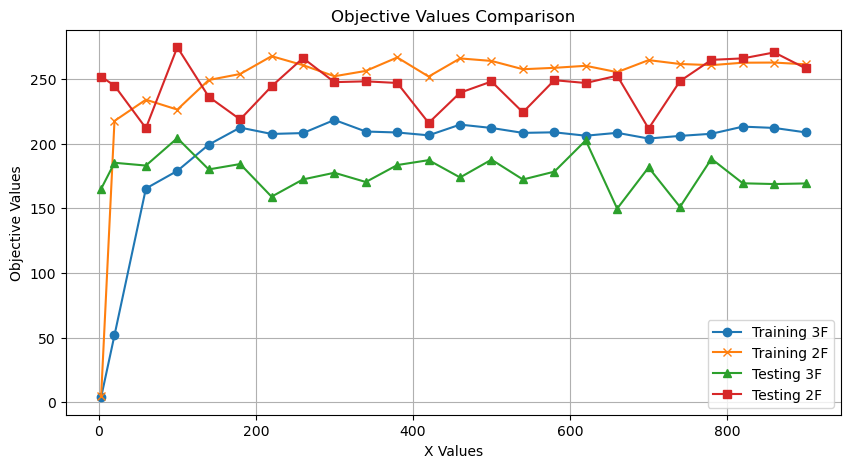

In [236]:
# X-axis values
x_values = [3, 20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 700, 740, 780, 820, 860, 900]

# Plotting
plt.figure(figsize=(10, 5))  # Adjust the size of the plot as needed

plt.plot(x_values, all_objectives_training_3f, label='Training 3F', marker='o')
plt.plot(x_values, all_objectives_training_2f, label='Training 2F', marker='x')
plt.plot(x_values, all_objectives_testing_3f, label='Testing 3F', marker='^')
plt.plot(x_values, all_objectives_testing_2f, label='Testing 2F', marker='s')  # Adjusted to 'testing_2f'

# Titles and labels
plt.title('Objective Values Comparison')
plt.xlabel('X Values')
plt.ylabel('Objective Values')
plt.legend()

# Grid for better readability
plt.grid(True)

# Show plot
plt.show()


CVar deviation objective values are less for 3F than 2F indicating that it performs better, therefore more flexible models tends to perform better.
Also with the increase in number of rows of training data, we can see that the difference between training and testing is converging. It means the objective of this exercise was achieved.